# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [35]:
# Cell 1: Import Library - Salin kode ini ke cell pertama template clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import joblib
import warnings
warnings.filterwarnings('ignore')

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?gid=2020477971&single=true&output=csv'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [36]:
# Cell 2: Load data - Salin ke cell "Load data"
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?gid=2020477971&single=true&output=csv'
df = pd.read_csv(url)

In [37]:
# CELL 3: Menampilkan 5 baris pertama dataset - JANGAN gunakan print()
df.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 8:06:39


In [38]:
# Cell 4: Info dataset - JANGAN gunakan print()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   PreviousTransactionDate  2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [39]:
# Cell 5: Statistik deskriptif - JANGAN gunakan print()
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

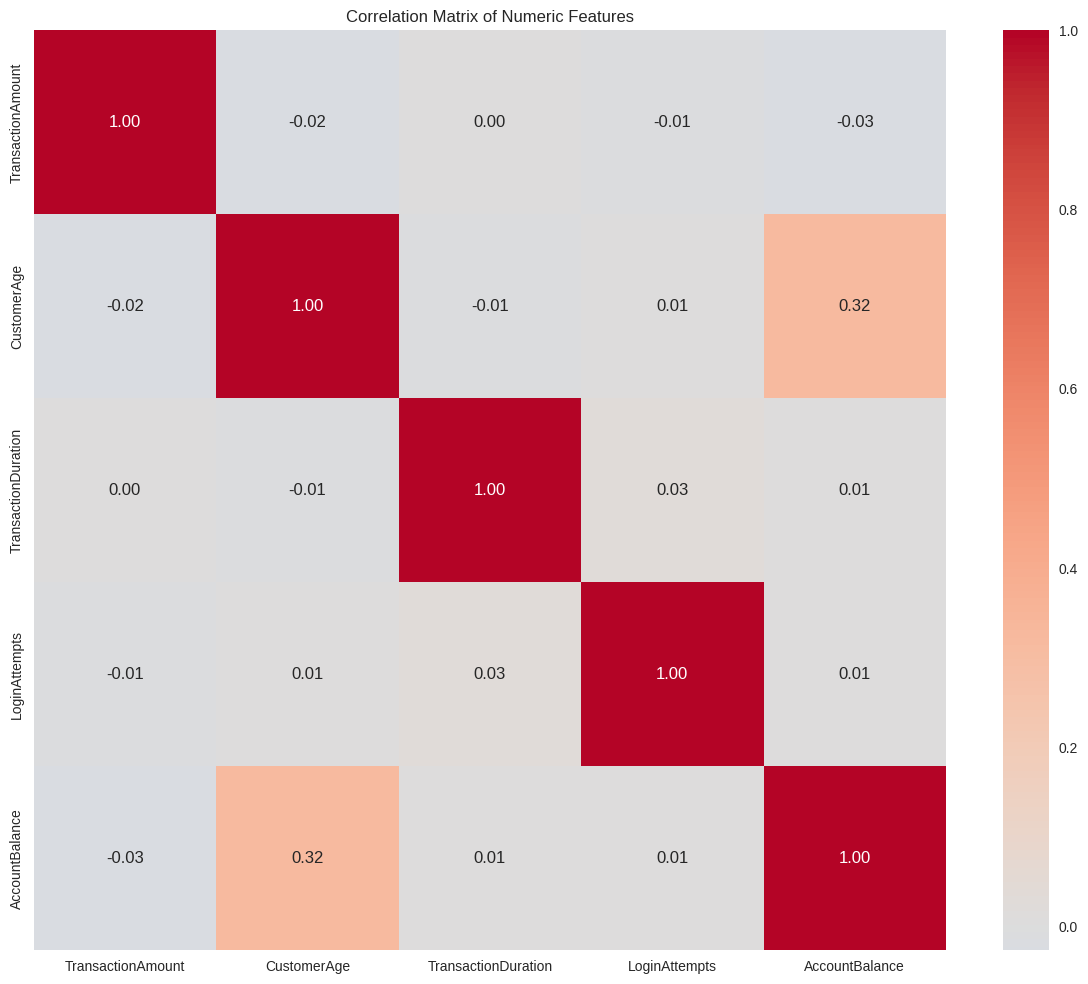

In [40]:
# Cell 6: Menampilkan korelasi antar fitur (Opsional Skilled 1)
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

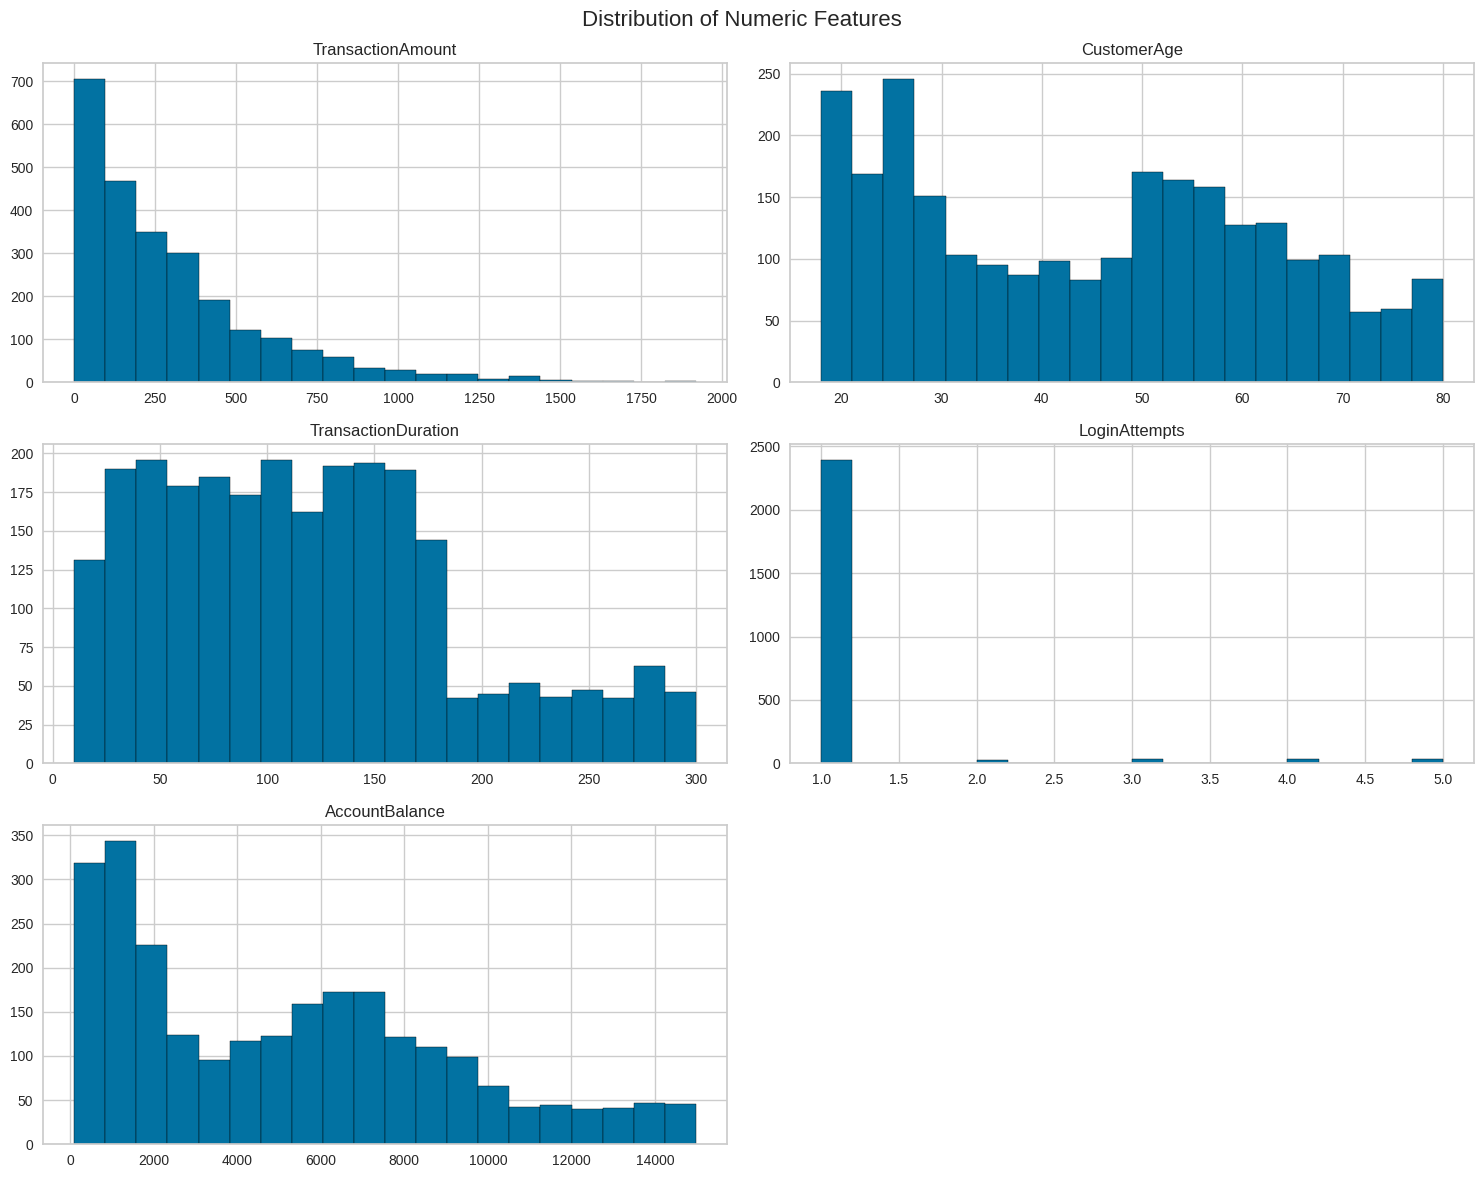

In [41]:
# Cell 7: Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df[numeric_cols].hist(bins=20, figsize=(15, 12), edgecolor='black')
plt.suptitle('Distribution of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

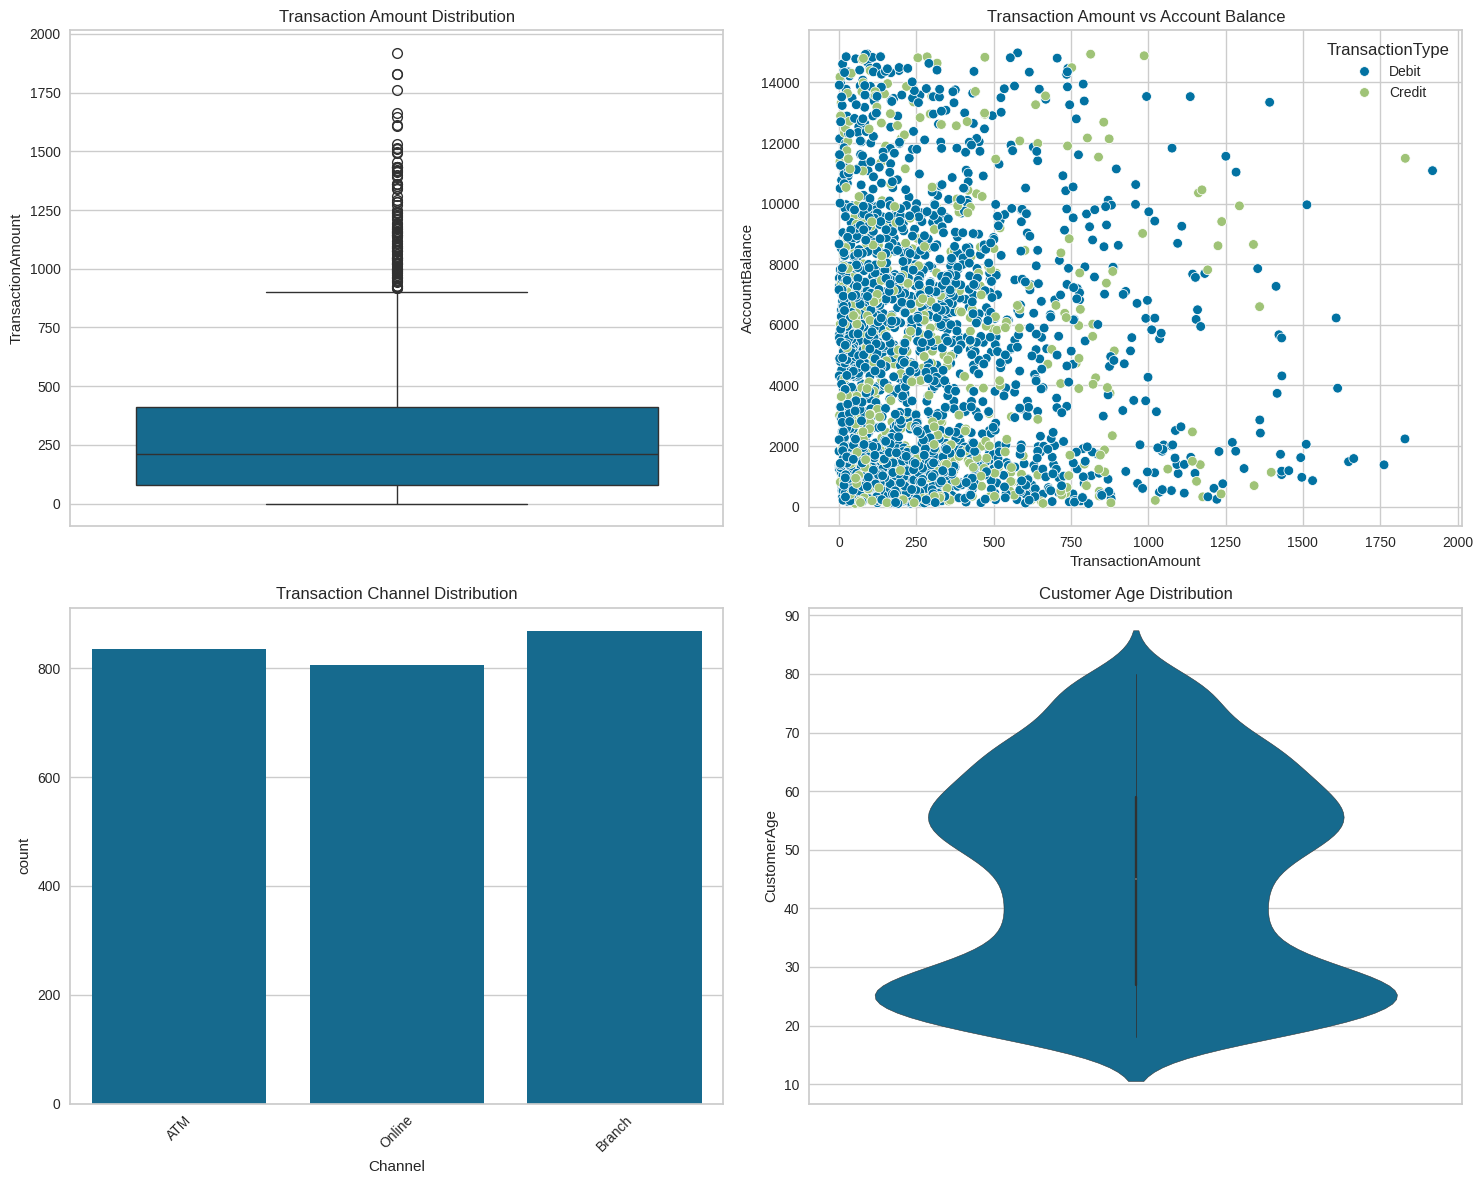

In [42]:
# Cell 8: Visualisasi yang lebih informatif (Opsional Advanced 1)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Box plot untuk TransactionAmount
sns.boxplot(data=df, y='TransactionAmount', ax=axes[0,0])
axes[0,0].set_title('Transaction Amount Distribution')

# Scatter plot TransactionAmount vs AccountBalance
sns.scatterplot(data=df, x='TransactionAmount', y='AccountBalance',
                hue='TransactionType', ax=axes[0,1])
axes[0,1].set_title('Transaction Amount vs Account Balance')

# Count plot untuk Channel
sns.countplot(data=df, x='Channel', ax=axes[1,0])
axes[1,0].set_title('Transaction Channel Distribution')
axes[1,0].tick_params(axis='x', rotation=45)

# Violin plot untuk CustomerAge
sns.violinplot(data=df, y='CustomerAge', ax=axes[1,1])
axes[1,1].set_title('Customer Age Distribution')

plt.tight_layout()
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [43]:
# Cell 9: Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
PreviousTransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [44]:
# Cell 9: Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
PreviousTransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [45]:
# Cell 11: Feature scaling untuk fitur numerik
numerical_cols = ['TransactionAmount', 'AccountBalance', 'CustomerAge', 'TransactionDuration', 'LoginAttempts']

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,-0.970546,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,1.419862,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 8:08:08
1,TX000002,AC00455,0.268963,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,1.307715,Doctor,0.307960,-0.204629,2.218381,2024-11-04 8:09:35
2,TX000003,AC00019,-0.586526,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,-1.439874,Student,-0.905207,-0.204629,-1.024091,2024-11-04 8:07:04
3,TX000004,AC00070,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,-1.047361,Student,-1.347656,-0.204629,0.886694,2024-11-04 8:09:06
4,TX000005,AC00411,-0.972736,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,1.121495,-0.204629,0.594263,2024-11-04 8:06:39


In [46]:
# Cell 12: Drop kolom ID dan IP Address
columns_to_drop = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID']
df = df.drop(columns=columns_to_drop)

df.shape

(2537, 11)

In [47]:
# Cell 13: Feature encoding untuk fitur kategorikal
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

df.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,-0.970546,2023-04-11 16:29:14,1,36,0,1.419862,0,-0.548393,-0.204629,-0.000315,2024-11-04 8:08:08
1,0.268963,2023-06-27 16:44:19,1,15,0,1.307715,0,0.307960,-0.204629,2.218381,2024-11-04 8:09:35
2,-0.586526,2023-07-10 18:16:08,1,23,2,-1.439874,3,-0.905207,-0.204629,-1.024091,2024-11-04 8:07:04
3,-0.387294,2023-05-05 16:32:11,1,33,2,-1.047361,3,-1.347656,-0.204629,0.886694,2024-11-04 8:09:06
4,-0.972736,2023-10-16 17:51:24,0,1,2,NaN,3,1.121495,-0.204629,0.594263,2024-11-04 8:06:39


In [48]:
# Cell 14: Last checking columns
df.columns.tolist()

['TransactionAmount',
 'PreviousTransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'TransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [49]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).

# Cell 15: Menangani data yang hilang
df = df.dropna()
df.isnull().sum()

,0
TransactionAmount,0
PreviousTransactionDate,0
TransactionType,0
Location,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0


In [50]:
# Menghapus data duplikat menggunakan drop_duplicates().
# Cell 16: Menghapus data duplikat
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [51]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_condition = ((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)
print(f"Jumlah outliers: {outlier_condition.sum()}")

# Menghapus outliers
df = df[~outlier_condition]
print(f"Shape setelah menghapus outliers: {df.shape}")

Jumlah outliers: 212
Shape setelah menghapus outliers: (2136, 11)


In [52]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.
df['TransactionAmount_bin'] = pd.cut(df['TransactionAmount'], bins=3, labels=['Low', 'Medium', 'High'])
df['CustomerAge_bin'] = pd.cut(df['CustomerAge'], bins=4, labels=['Young', 'Adult', 'Middle', 'Senior'])

# Encode binning results
le_amount = LabelEncoder()
le_age = LabelEncoder()

df['TransactionAmount_bin'] = le_amount.fit_transform(df['TransactionAmount_bin'])
df['CustomerAge_bin'] = le_age.fit_transform(df['CustomerAge_bin'])

df[['TransactionAmount_bin', 'CustomerAge_bin']].head()

,TransactionAmount_bin,CustomerAge_bin
0,1,2
1,2,2
2,1,3
3,1,3
5,1,3


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [53]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
df.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionAmount_bin,CustomerAge_bin
count,2136.000000,2136.000000,2136.000000,2136.000000,2136.000000,2136.000000,2136.000000,2.136000e+03,2136.000000,2136.000000,2136.000000
mean,-0.147012,0.789326,21.502341,1.010300,0.001676,1.529494,-0.007152,-2.046294e-01,0.001119,1.149813,1.680712
std,0.743188,0.439926,12.466461,0.825749,0.995107,1.153376,1.003280,8.162050e-15,0.997675,0.564384,1.142790
min,-1.017881,0.000000,0.000000,0.000000,-1.495947,0.000000,-1.561745,-2.046294e-01,-1.286100,0.000000,0.000000
25%,-0.752609,1.000000,11.000000,0.000000,-0.991288,0.000000,-0.808867,-2.046294e-01,-0.925190,1.000000,1.000000
50%,-0.340010,1.000000,22.000000,1.000000,0.018031,2.000000,-0.134489,-2.046294e-01,-0.095238,1.000000,2.000000
75%,0.260056,1.000000,32.000000,2.000000,0.803056,3.000000,0.607683,-2.046294e-01,0.653337,1.000000,3.000000
max,2.072523,2.000000,43.000000,3.000000,1.980594,4.000000,2.577295,-2.046294e-01,2.531190,2.000000,3.000000


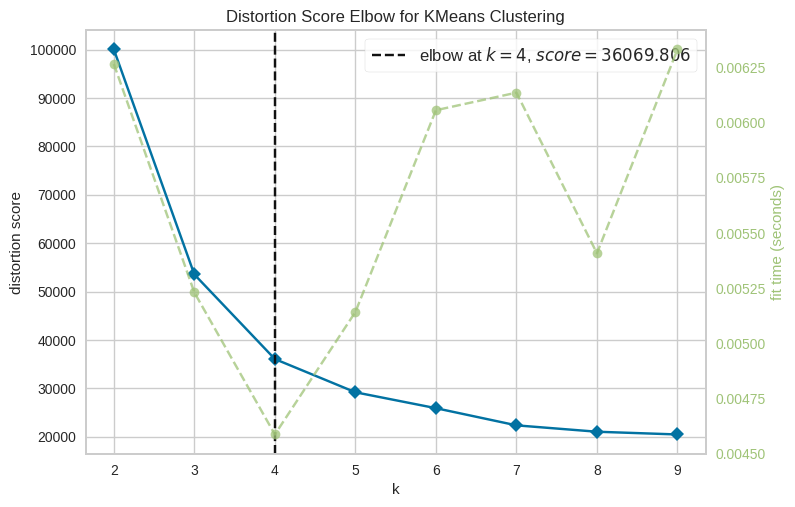

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [54]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
# Drop date columns before fitting the visualizer
df_numeric = df.drop(columns=['PreviousTransactionDate', 'TransactionDate'])

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(df_numeric) # Use the dataframe without date columns
visualizer.show()

In [55]:
# Menggunakan algoritma K-Means Clustering
optimal_k = visualizer.elbow_value_
model_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10) # Added n_init to suppress warning
model_kmeans.fit(df_numeric)

KMeans(n_clusters=np.int64(4), n_init=10, random_state=42)

Jalankan cell code ini untuk menyimpan model kamu.

In [56]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
import joblib
joblib.dump(model_kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [57]:
# Menghitung dan menampilkan nilai Silhouette Score.
silhouette_avg = silhouette_score(df_numeric, model_kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.4381


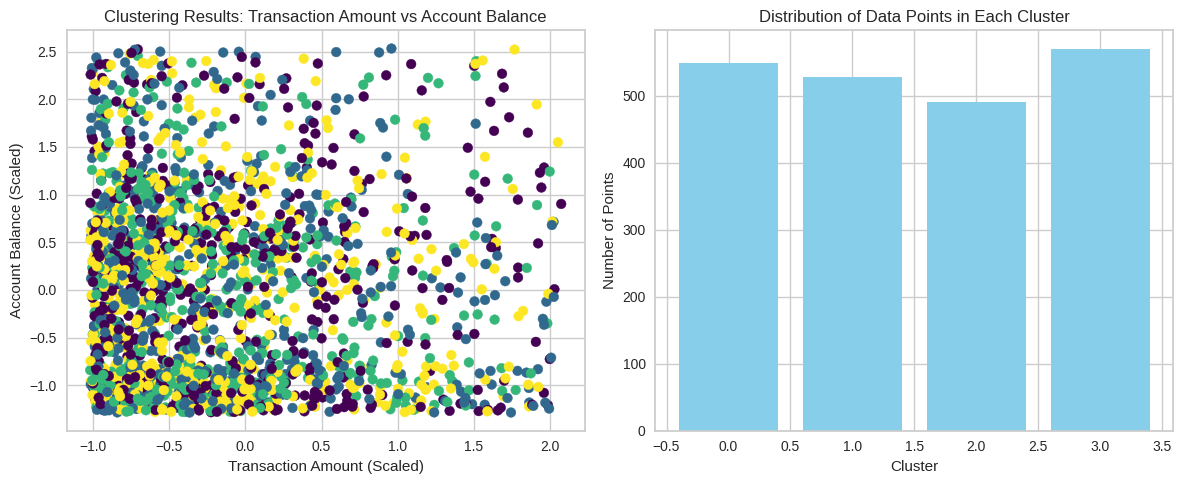

In [58]:
# Membuat visualisasi hasil clustering
plt.figure(figsize=(12, 5))

# Scatter plot untuk 2 fitur utama
plt.subplot(1, 2, 1)
plt.scatter(df['TransactionAmount'], df['AccountBalance'], c=model_kmeans.labels_, cmap='viridis')
plt.xlabel('Transaction Amount (Scaled)')
plt.ylabel('Account Balance (Scaled)')
plt.title('Clustering Results: Transaction Amount vs Account Balance')

# Plot distribusi cluster
plt.subplot(1, 2, 2)
unique, counts = np.unique(model_kmeans.labels_, return_counts=True)
plt.bar(unique, counts, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.title('Distribution of Data Points in Each Cluster')

plt.tight_layout()
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [59]:
# Membangun model menggunakan PCA.
# ___ =PCA(n_components=<x>)
# ___ = ____.fit_transform(___)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
# <data_final> = pd.DataFrame(___, columns=['PCA1', 'PCA2', <sesuaikan dengan jumlah n>])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
# ___ = KMeans(n_clusters=<x>)
# ___.fit(<data_final>)
pca = PCA(n_components=3)
data_pca = pca.fit_transform(df_numeric)

data_final = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2', 'PCA3'])

model_kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42, n_init=10) # Added n_init
model_kmeans_pca.fit(data_final)

print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.4f}")

Explained variance ratio: [0.95471902 0.01755994 0.00620993]
Total explained variance: 0.9785


In [60]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
# joblib.dump(___, "PCA_model_clustering.h5")
joblib.dump(model_kmeans_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [61]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
df['Cluster'] = model_kmeans.labels_

cluster_analysis = df.groupby('Cluster')[numerical_cols].agg(['mean', 'min', 'max'])
cluster_analysis

TransactionAmount                     AccountBalance            \
                     mean       min       max           mean       min   
Cluster                                                                  
0               -0.125875 -1.017231  2.072523       0.059912 -1.283147   
1               -0.145327 -1.013945  2.023990      -0.004215 -1.286100   
2               -0.157773 -1.017881  1.996917      -0.047166 -1.280458   
3               -0.159648 -1.017676  2.050618      -0.008888 -1.281807   

                  CustomerAge                     TransactionDuration  \
              max        mean       min       max                mean   
Cluster                                                                 
0        2.522155    0.023863 -1.495947  1.980594            0.057487   
1        2.531190   -0.098045 -1.495947  1.980594           -0.057504   
2        2.453714    0.031621 -1.495947  1.980594           -0.043215   
3        2.520287    0.047004 -1.495947  1.980594            0.008437   

                            LoginAttempts                      
              min       max          mean       min       max  
Cluster                                                        
0       -1.561745  2.563023     -0.204629 -0.204629 -0.204629  
1       -1.561745  2.520205     -0.204629 -0.204629 -0.204629  
2       -1.533199  2.563023     -0.204629 -0.204629 -0.204629  
3       -1.561745  2.577295     -0.204629 -0.204629 -0.204629

# Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.

## 1. **Cluster 0: (Nasabah Premium dengan Saldo Tinggi):**
   - Rata-rata (mean) TransactionAmount: -0.125875 (tertinggi di antara semua cluster)
   - Rata-rata (mean) AccountBalance: 0.059912 (tertinggi, saldo paling besar)
   - Rata-rata (mean) TransactionDuration: 0.057487 (tertinggi, durasi transaksi paling lama)
   - **Analisis:** Cluster ini merepresentasikan nasabah dengan profil premium yang melakukan transaksi dengan nilai tertinggi dan memiliki saldo rekening terbesar. Mereka cenderung lebih berhati-hati dalam bertransaksi dengan durasi yang lebih lama, menunjukkan kehati-hatian dalam pengambilan keputusan finansial. Kelompok ini cocok untuk produk wealth management dan layanan priority banking.

## 2. **Cluster 1: (Nasabah Muda dengan Transaksi Cepat):**
   - Rata-rata (mean) CustomerAge: -0.098045 (terendah, nasabah termuda)
   - Rata-rata (mean) TransactionDuration: -0.057504 (kedua terendah, transaksi cepat)
   - Rata-rata (mean) TransactionAmount: -0.145327 (kedua tertinggi)
   - **Analisis:** Cluster ini didominasi oleh nasabah termuda yang efisien dalam bertransaksi. Mereka melakukan transaksi dengan nilai cukup tinggi namun dengan durasi yang relatif cepat, menunjukkan kemahiran dalam menggunakan sistem perbankan digital. Kelompok ini ideal untuk produk digital banking dan mobile payment solutions.

## 3. **Cluster 2: (Nasabah dengan Saldo Terbatas):**
   - Rata-rata (mean) AccountBalance: -0.047166 (terendah di antara semua cluster)
   - Rata-rata (mean) TransactionAmount: -0.157773 (kedua terendah)
   - Rata-rata (mean) CustomerAge: 0.031621 (sedikit di atas rata-rata)
   - **Analisis:** Cluster ini menunjukkan profil nasabah dengan saldo rekening terendah namun tetap aktif bertransaksi. Meskipun nilai transaksi mereka relatif kecil, mereka menunjukkan potensi untuk berkembang. Kelompok ini berpotensi untuk produk yang membantu meningkatkan likuiditas seperti kredit mikro atau program financial literacy.

## 4. **Cluster 3: (Nasabah Matang dengan Transaksi Konservatif):**
   - Rata-rata (mean) CustomerAge: 0.047004 (tertinggi, nasabah paling matang)
   - Rata-rata (mean) TransactionAmount: -0.159648 (terendah di antara semua cluster)
   - Rata-rata (mean) TransactionDuration: 0.008437 (mendekati rata-rata, durasi normal)
   - **Analisis:** Cluster ini merepresentasikan nasabah dengan usia paling matang yang cenderung konservatif dalam bertransaksi. Mereka melakukan transaksi dengan nilai terkecil namun menunjukkan pola yang stabil dan konsisten. Kelompok ini cocok untuk produk tabungan berjangka, asuransi, dan perencanaan pensiun.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [62]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df['Target'] = df['Cluster']
df = df.drop('Cluster', axis=1)

df.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,TransactionAmount_bin,CustomerAge_bin,Target
0,-0.970546,2023-04-11 16:29:14,1,36,0,1.419862,0,-0.548393,-0.204629,-0.000315,2024-11-04 8:08:08,1,2,1
1,0.268963,2023-06-27 16:44:19,1,15,0,1.307715,0,0.307960,-0.204629,2.218381,2024-11-04 8:09:35,2,2,0
2,-0.586526,2023-07-10 18:16:08,1,23,2,-1.439874,3,-0.905207,-0.204629,-1.024091,2024-11-04 8:07:04,1,3,2
3,-0.387294,2023-05-05 16:32:11,1,33,2,-1.047361,3,-1.347656,-0.204629,0.886694,2024-11-04 8:09:06,1,3,1
5,-0.703375,2023-04-03 17:15:01,1,28,0,-1.495947,3,0.750409,-0.204629,-1.111505,2024-11-04 8:06:36,1,3,2


In [63]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [64]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
# ___.head()
df_inverse = df.copy()
df_inverse[numerical_cols] = scaler.inverse_transform(df_inverse[numerical_cols])
df_inverse.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,TransactionAmount_bin,CustomerAge_bin,Target
0,14.09,2023-04-11 16:29:14,1,36,0,70.0,0,81.0,1.0,5112.21,2024-11-04 8:08:08,1,2,1
1,376.24,2023-06-27 16:44:19,1,15,0,68.0,0,141.0,1.0,13758.91,2024-11-04 8:09:35,2,2,0
2,126.29,2023-07-10 18:16:08,1,23,2,19.0,3,56.0,1.0,1122.35,2024-11-04 8:07:04,1,3,2
3,184.50,2023-05-05 16:32:11,1,33,2,26.0,3,25.0,1.0,8569.06,2024-11-04 8:09:06,1,3,1
5,92.15,2023-04-03 17:15:01,1,28,0,18.0,3,172.0,1.0,781.68,2024-11-04 8:06:36,1,3,2


In [65]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
# for ___ in categorical_cols:
#     ___ = encoders[col]
#     df[col] = ___.inverse_transform(df_inverse[col].astype(int))
# tampilkan dataset yang sudah di-inverse
# ___.head()
for col in categorical_cols:
    le = encoders[col]
    df_inverse[col] = le.inverse_transform(df_inverse[col].astype(int))

df_inverse.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,TransactionAmount_bin,CustomerAge_bin,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08,1,2,1
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35,2,2,0
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04,1,3,2
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06,1,3,1
5,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 8:06:36,1,3,2


In [66]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.
cluster_analysis_inverse = df_inverse.groupby('Target').agg({
    'TransactionAmount': ['mean', 'min', 'max'],
    'AccountBalance': ['mean', 'min', 'max'],
    'CustomerAge': ['mean', 'min', 'max'],
    'TransactionType': lambda x: x.mode()[0],
    'Channel': lambda x: x.mode()[0]
})
cluster_analysis_inverse

TransactionAmount               AccountBalance                    \
                    mean   min     max           mean     min       max   
Target                                                                    
0             260.879434  0.45  903.19    5346.929051  112.76  14942.78   
1             255.196061  1.41  889.01    5097.010682  101.25  14977.99   
2             251.559674  0.26  881.10    4929.623625  123.24  14676.05   
3             251.011740  0.32  896.79    5078.798278  117.98  14935.50   

       CustomerAge             TransactionType  Channel  
              mean   min   max        <lambda> <lambda>  
Target                                                   
0        45.104015  18.0  80.0           Debit   Branch  
1        42.929924  18.0  80.0           Debit   Branch  
2        45.242363  18.0  80.0           Debit      ATM  
3        45.516696  18.0  80.0           Debit   Branch

# Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.

## 1. **Cluster 0: (Nasabah dengan Transaksi Nilai Tinggi):**
   - Rata-rata (mean) TransactionAmount: 260.879434 (tertinggi di antara semua cluster)
   - Rata-rata (mean) AccountBalance: 5346.929051 (tertinggi, saldo paling besar)
   - Rata-rata (mean) CustomerAge: 45.104015 (sedikit di atas rata-rata)
   - **Analisis:** Cluster ini merepresentasikan nasabah premium dengan nilai transaksi tertinggi (rata-rata 260.87) dan saldo rekening terbesar (rata-rata 5,346.93). Kelompok ini mayoritas menggunakan layanan Branch dan transaksi Debit, menunjukkan preferensi terhadap layanan tradisional. Nasabah dalam cluster ini cocok untuk produk wealth management dan layanan priority banking.

## 2. **Cluster 1: (Nasabah Aktif dengan Saldo Menengah):**
   - Rata-rata (mean) TransactionAmount: 255.196061 (kedua tertinggi)
   - Rata-rata (mean) AccountBalance: 5097.010682 (kedua tertinggi)
   - Rata-rata (mean) CustomerAge: 42.929924 (termuda di antara semua cluster)
   - **Analisis:** Cluster ini didominasi oleh nasabah dengan usia termuda (rata-rata 42.93 tahun) yang aktif bertransaksi dengan nilai cukup tinggi (255.20). Mereka memiliki saldo yang baik dan sepenuhnya menggunakan layanan Branch dengan transaksi Debit. Kelompok ini ideal untuk produk digital banking dan program pengembangan hubungan nasabah jangka panjang.

## 3. **Cluster 2: (Nasabah ATM dengan Saldo Terendah):**
   - Rata-rata (mean) AccountBalance: 4929.623625 (terendah di antara semua cluster)
   - Rata-rata (mean) TransactionAmount: 251.559674 (kedua terendah)
   - Rata-rata (mean) CustomerAge: 45.242363 (tertinggi dalam usia)
   - **Analisis:** Cluster ini unik karena merupakan satu-satunya kelompok yang menggunakan channel ATM untuk bertransaksi. Meskipun memiliki saldo terendah (4,929.62), mereka tetap aktif dengan transaksi Debit. Usia yang relatif lebih tua (45.24) menunjukkan preferensi terhadap ATM sebagai channel transaksi. Cocok untuk program edukasi digital banking dan peningkatan layanan ATM.

## 4. **Cluster 3: (Nasabah Konservatif dengan Saldo Tertinggi di Branch):**
   - Rata-rata (mean) AccountBalance: 5078.798278 (ketiga tertinggi)
   - Rata-rata (mean) TransactionAmount: 251.011740 (terendah di antara semua cluster)
   - Rata-rata (mean) CustomerAge: 45.516696 (tertinggi, nasabah paling matang)
   - **Analisis:** Cluster ini merepresentasikan nasabah dengan usia paling matang (45.52 tahun) yang cenderung konservatif dalam bertransaksi dengan nilai terendah (251.01). Mereka memiliki saldo yang baik dan sepenuhnya menggunakan layanan Branch dengan transaksi Debit. Kelompok ini cocok untuk produk tabungan berjangka, asuransi, dan perencanaan pensiun dengan pendekatan personal melalui cabang.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [67]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
df_final_inverse = df_inverse.copy()
df_final_inverse.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,TransactionAmount_bin,CustomerAge_bin,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08,1,2,1
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35,2,2,0
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04,1,3,2
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06,1,3,1
5,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 8:06:36,1,3,2


In [68]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)
df_final_inverse.to_csv('data_clustering_inverse.csv', index=False)

End of Code.